https://data.wprdc.org/dataset/arrest-data

In [19]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [4]:
arrest_pandas = pd.read_csv("ArrestData.csv")

arrest_pandas.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [5]:
df = pd.DataFrame(arrest_pandas)
df['ZipCodes'] = df['ARRESTLOCATION'].str.split().str[-1]

dfsorted = df.sort_values(by = ['ZipCodes'])
dfsorted.head(1000)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,ZipCodes
24648,2005806,18188634,18.0,F,W,2018-09-24T21:49:00,Zone 1,2701 Simple Assault. / 2718(a)(1) Strangulatio...,Zone 1,NaN,1,NaN,NaN,NaN,NaN,NaN,1
1481,1976306,16179695,26.0,F,B,2016-10-04T22:45:00,Zone 1,2701 Simple Assault. / 2701(b)(2) Simple Assau...,Zone 1,NaN,1,NaN,NaN,NaN,NaN,NaN,1
36113,2020459,19220662,56.0,M,W,2019-10-29T09:48:00,Zone 1,3304 Criminal Mischief. / 3127(a) Indecent exp...,Zone 1,NaN,1,NaN,NaN,NaN,NaN,NaN,1
36109,2020455,19220436,37.0,M,W,2019-10-29T01:00:00,Zone 1,3304 Criminal Mischief. / 5505 Public Drunkenn...,Zone 1,NaN,1,NaN,NaN,NaN,NaN,NaN,1
10117,1987270,17119676,28.0,F,B,2017-06-28T12:56:00,Zone 1,2706 Terroristic Threats. / 2904 Interference ...,Zone 1,NaN,1,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9026,1986010,17099708,23.0,M,W,2017-05-31T18:40:00,4400 Block Stanton AV & McCandless AV Pittsbur...,13(a)(16) Possession of Controlled Substance /...,4400 Block Stanton AV & McCandless AV Pittsbur...,Stanton Heights,5,1018.0,NaN,NaN,0.000000,0.000000,15201
8634,1985484,17091820,37.0,F,W,2017-05-20T00:39:00,"5100 Block Butler ST Pittsburgh, PA 15201","6308(a) Underage Purchase, Consume, Possessed ...","5100 Block Butler ST Pittsburgh, PA 15201",Upper Lawrenceville,2,1011.0,7.0,2.0,-79.955435,40.478364,15201
40796,2027004,20092068,40.0,M,W,2020-05-18T11:45:00,"200 Block 57th ST Pittsburgh, PA 15201",9093 Indirect Criminal Contempt,"200 Block 57th ST Pittsburgh, PA 15201",Stanton Heights,5,1018.0,7.0,2.0,-79.945777,40.484437,15201
42099,2028843,20127858,59.0,M,W,2020-07-11T22:53:00,"Woodbine ST & Arcade WY Pittsburgh, PA 15201",3323 Stop Signs and Yield Signs. / 3731 Drivin...,"1100 Block Downlook ST Pittsburgh, PA 15201",Stanton Heights,5,1018.0,7.0,2.0,-79.939608,40.483728,15201


In [6]:
zipcodeFrequency = df['ZipCodes']
zipcodeCounts = pd.Series(zipcodeFrequency).value_counts()
print(zipcodeCounts)

15219    14814
15212     5708
15210     3223
15206     2786
15203     2149
         ...  
18801        1
19403        1
15084        1
15317        1
15642        1
Name: ZipCodes, Length: 130, dtype: int64


<AxesSubplot:>

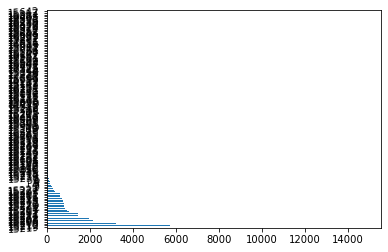

In [18]:
zipcodeCounts.plot.barh(rot = 4)